# CIOFS

In [1]:
import ocean_model_skill_assessor as omsa

Set up model and data catalogs. 

In [2]:
project_name = "ciofs_ncei"
# compare sea water temperature
key = "temp"

# model set up
loc = r"https://www.ncei.noaa.gov/thredds/dodsC/model-ciofs-agg/Aggregated_CIOFS_Fields_Forecast_best.ncd"
model_name = "model"
kwargs_open = dict(drop_variables=["ocean_time"])

# data catalog set up
catalog_name = "erddap"
kwargs = dict(server="https://erddap.sensors.ioos.us/erddap", category_search=["standard_name", key])
kwargs_search = dict(min_time="2020-6-1", max_time="2020-6-5", max_lat=61.5, max_lon=-149, 
                     min_lat=56.8, min_lon=-156)

In [3]:
# set up model catalog
cat_model = omsa.make_catalog(project_name=project_name, 
                              catalog_type="local", 
                              catalog_name=model_name, 
                              kwargs=dict(filenames=loc, skip_entry_metadata=True),
                              kwargs_open=kwargs_open,
                              save_cat=True)

[2023-02-06 14:09:09,220] {/Users/kthyng/projects/ocean-model-skill-assessor/ocean_model_skill_assessor/main.py:378} INFO - Catalog saved to /Users/kthyng/Library/Caches/ocean-model-skill-assessor/ciofs_ncei/model.yaml with 1 entries.


In [4]:
# set up data catalog
cat_data = omsa.make_catalog(project_name=project_name, 
                             catalog_type="erddap", 
                             catalog_name=catalog_name, 
                             kwargs=kwargs,
                             save_cat=True,
                             kwargs_search=kwargs_search,
                             vocab="standard_names")

[2023-02-06 14:09:12,997] {/Users/kthyng/projects/intake-erddap/intake_erddap/erddap_cat.py:246} WARNING - search https://erddap.sensors.ioos.us/erddap/search/advanced.csv?page=1&itemsPerPage=100000&protocol=tabledap&cdm_data_type=(ANY)&institution=(ANY)&ioos_category=(ANY)&keywords=(ANY)&long_name=(ANY)&standard_name=sea_surface_temperature&variableName=(ANY)&minLon=-156&maxLon=-149&minLat=56.8&maxLat=61.5&minTime=1590969600.0&maxTime=1591315200.0 returned HTTP 404
[2023-02-06 14:09:14,934] {/Users/kthyng/projects/ocean-model-skill-assessor/ocean_model_skill_assessor/main.py:378} INFO - Catalog saved to /Users/kthyng/Library/Caches/ocean-model-skill-assessor/ciofs_ncei/erddap.yaml with 42 entries.


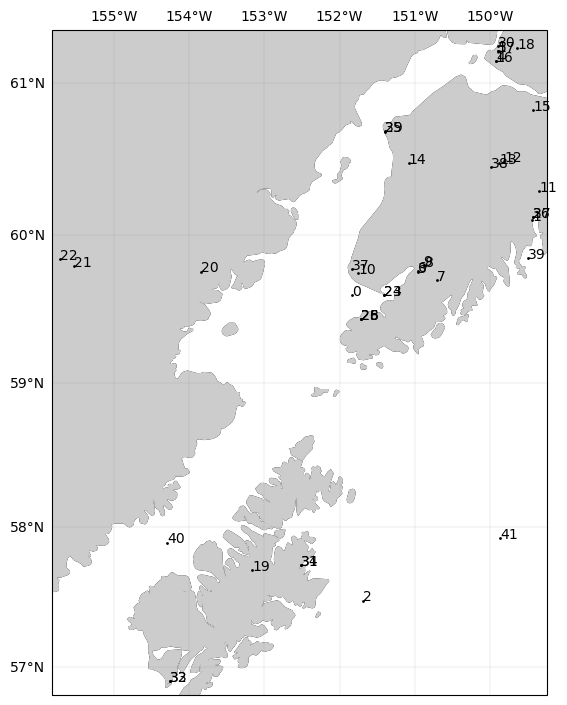

In [5]:
# Plot discovered data locations
omsa.plot.map.plot_cat_on_map(catalog=catalog_name, project_name=project_name)

The image shows a map of the Cook Inlet area with black dots with numbered labels showing data locations.

Plot first 3 datasets in the data catalog.

[2023-02-06 14:09:37,384] {/Users/kthyng/projects/ocean-model-skill-assessor/ocean_model_skill_assessor/main.py:447} INFO - Note that we are using 3 datasets of 42 datasets. This might take awhile.
[2023-02-06 14:09:47,855] {/Users/kthyng/miniconda3/envs/omsa/lib/python3.10/warnings.py:109} WARNING - /Users/kthyng/miniconda3/envs/omsa/lib/python3.10/site-packages/xarray/conventions.py:523: SerializationWarning: variable 'u' has multiple fill values {0.0, 1e+37}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(

[2023-02-06 14:09:47,857] {/Users/kthyng/miniconda3/envs/omsa/lib/python3.10/warnings.py:109} WARNING - /Users/kthyng/miniconda3/envs/omsa/lib/python3.10/site-packages/xarray/conventions.py:523: SerializationWarning: variable 'v' has multiple fill values {0.0, 1e+37}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(

[2023-02-06 14:09:47,858] {/Users/kthyng/miniconda3/envs/omsa/lib/python3.10/warnings.py:109} WARNING - /Users/kthyng/miniconda3/envs/

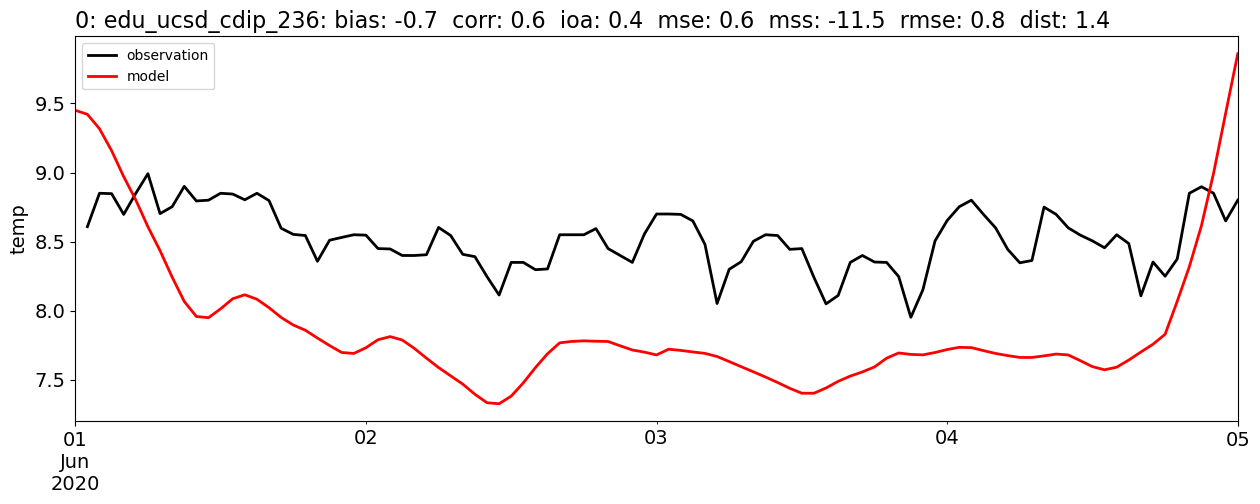

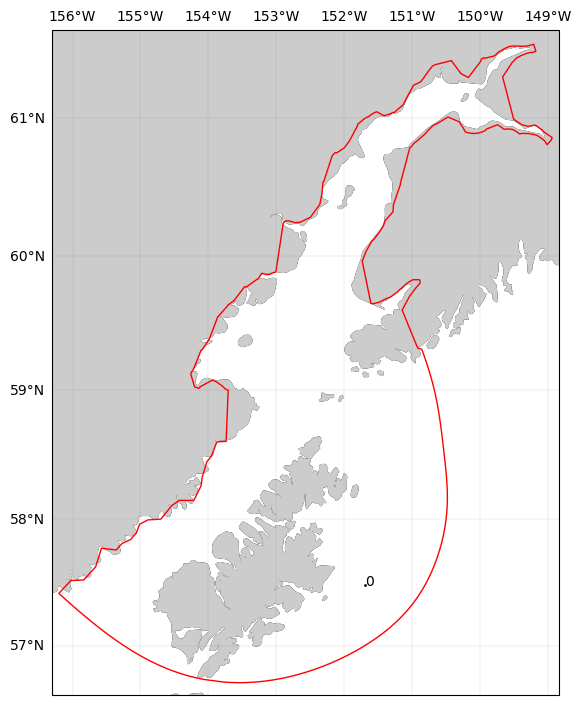

In [6]:
omsa.run(project_name=project_name, catalogs=catalog_name, model_name=model_name,
         vocabs=["general","standard_names"], key_variable=key, ndatasets=3)

The first plot shows time series of temperature from data station "edu_ucsd_cdip_236" and nearby model output.

The second plot shows the Cook Inlet region on a map with a red outline of the numerical model boundary along with a black dot and number "0" showing the data location from which the data was taken.